## Project

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("BlackFriday.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [5]:
df.describe(include=['O'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,537577,537577,537577,537577,537577
unique,3623,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1858,405380,214690,226493,189192


In [6]:
print('<Contain NaNs?>')
print(df.isnull().any())
missing_ser_percentage = (df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)
missing_ser_percentage = missing_ser_percentage[missing_ser_percentage!=0].round(2)
missing_ser_percentage.name = 'missing values %'
print('\n<NaN ratio>')
print(missing_ser_percentage)

<Contain NaNs?>
User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

<NaN ratio>
Product_Category_3    69.44
Product_Category_2    31.06
Name: missing values %, dtype: float64


In [7]:
df['Product_Category_2'].fillna(0, inplace=True)
df['Product_Category_3'].fillna(0, inplace=True)

In [8]:
print('<Contain NaNs?>')
print(df.isnull().any())
missing_ser_percentage = (df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)
missing_ser_percentage = missing_ser_percentage[missing_ser_percentage!=0].round(2)
missing_ser_percentage.name = 'missing values %'
print('\n<NaN ratio>')
print(missing_ser_percentage)

<Contain NaNs?>
User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2            False
Product_Category_3            False
Purchase                      False
dtype: bool

<NaN ratio>
Series([], Name: missing values %, dtype: float64)


In [9]:
df['PurchaseBand'] = pd.qcut(df['Purchase'], 10)
df[['PurchaseBand', 'Purchase']].groupby(['PurchaseBand'], as_index=False).mean().sort_values(by='PurchaseBand', ascending=True)

,PurchaseBand,Purchase
0,"(184.999, 3608.0]",2262.936063
1,"(3608.0, 5293.0]",4484.843342
2,"(5293.0, 6166.0]",5736.832638
3,"(6166.0, 7166.0]",6944.835715
4,"(7166.0, 8062.0]",7808.952464
5,"(8062.0, 9577.0]",8536.042968
6,"(9577.0, 11555.0]",10297.391392
7,"(11555.0, 15179.0]",12423.337553
8,"(15179.0, 16337.4]",15640.675466
9,"(16337.4, 23961.0]",19211.581383


In [10]:
r = [184,3608, 5293, 6166, 7166,  8062, 9577,15179,16337,24000]
g = [1,2,3,4,5,6,7,8,9]
df['Purchase2'] = pd.cut(df['Purchase'], bins=r, labels=g)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,PurchaseBand,Purchase2
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370,"(8062.0, 9577.0]",6
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,"(15179.0, 16337.4]",8
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422,"(184.999, 3608.0]",1
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057,"(184.999, 3608.0]",1
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969,"(7166.0, 8062.0]",5


In [11]:
df[['Gender', 'Purchase']].groupby(['Gender'], as_index=False).count().sort_values(by='Purchase', ascending=False)

,Gender,Purchase
1,M,405380
0,F,132197


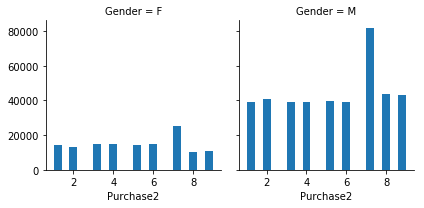

In [12]:
g = sns.FacetGrid(df, col='Gender')
g.map(plt.hist, 'Purchase2', bins=20)

In [13]:
df.groupby('Gender').sum()[['Product_Category_1','Product_Category_2','Product_Category_3']]



,Product_Category_1,Product_Category_2,Product_Category_3
Gender,,,
F,739701,899216.0,459889.0
M,2107063,2748194.0,1621487.0


In [14]:
df[df.Gender=='M'].groupby('Marital_Status').sum()[['Product_Category_1','Product_Category_2','Product_Category_3']]



,Product_Category_1,Product_Category_2,Product_Category_3
Marital_Status,,,
0,1235727,1630874.0,968729.0
1,871336,1117320.0,652758.0


In [15]:
df[df.Gender=='F'].groupby('Marital_Status').sum()[['Purchase']]

,Purchase
Marital_Status,
0,673815717
1,490808304


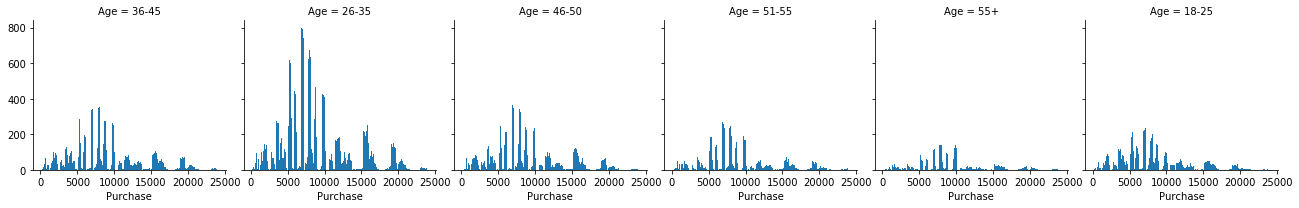

In [16]:
dfx=df[(df['Gender']=='F') & (df['Marital_Status']==1)]
g = sns.FacetGrid(dfx, col='Age')
g.map(plt.hist, 'Purchase', bins=200)

In [17]:
dfx=df[(df['Gender']=='M') & (df['Marital_Status']==1)]
dfx.sort_values(by='Purchase2', ascending=False)
#g = sns.FacetGrid(dfx, col='Occupation',hue="Occupation",height=15)
#g.map(plt.hist, 'Purchase')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,PurchaseBand,Purchase2
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215,"(16337.4, 23961.0]",9
188495,1005092,P00184942,M,55+,14,C,1,1,1,8.0,17.0,19568,"(16337.4, 23961.0]",9
349936,1005889,P00110842,M,51-55,20,C,1,1,1,2.0,5.0,19012,"(16337.4, 23961.0]",9
188492,1005091,P00147942,M,26-35,17,B,1,1,1,16.0,0.0,19287,"(16337.4, 23961.0]",9
188488,1005091,P00114942,M,26-35,17,B,1,1,1,15.0,16.0,19458,"(16337.4, 23961.0]",9
188486,1005091,P00057642,M,26-35,17,B,1,1,1,15.0,16.0,19045,"(16337.4, 23961.0]",9
350001,1005903,P00025442,M,26-35,11,C,1,1,1,2.0,9.0,19599,"(16337.4, 23961.0]",9
350056,1005914,P00112442,M,36-45,2,C,3,1,6,8.0,0.0,16511,"(16337.4, 23961.0]",9
188414,1005083,P00344542,M,26-35,4,B,4+,1,16,0.0,0.0,20896,"(16337.4, 23961.0]",9
492701,1003853,P00148642,M,26-35,14,B,1,1,6,10.0,13.0,20260,"(16337.4, 23961.0]",9


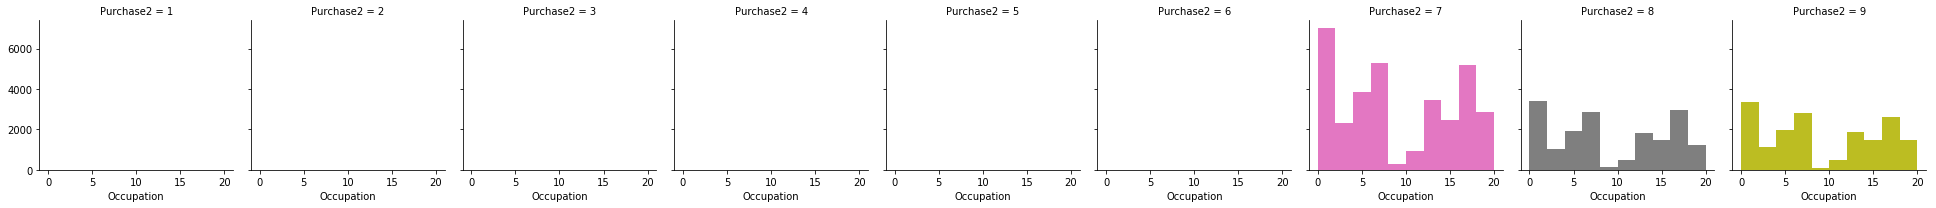

In [18]:
dfx=df[(df['Gender']=='M') & (df['Marital_Status']==1) & (df['Purchase2'] > 6)]
g = sns.FacetGrid(dfx, col='Purchase2',hue="Purchase2")
g.map(plt.hist, 'Occupation')

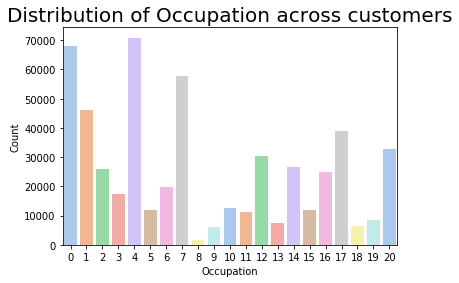

In [44]:
# visualizing the occupation of customers

sns.countplot(df['Occupation'], palette = 'pastel')
plt.title('Distribution of Occupation across customers', fontsize = 20)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

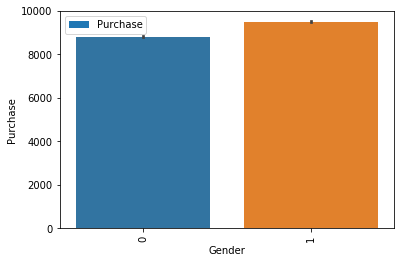

In [45]:
df[['Gender','Purchase']].groupby('Gender').mean().plot.bar()
sns.barplot('Gender', 'Purchase', data = df)
plt.show()

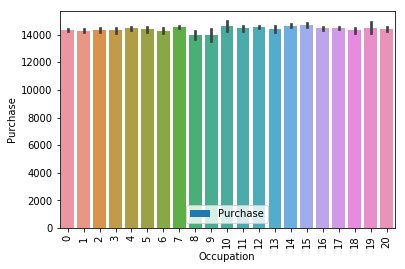

In [20]:
dfx[['Occupation','Purchase']].groupby('Occupation').mean().plot.bar()
sns.barplot('Occupation', 'Purchase', data = dfx)
plt.show()

In [21]:
#dfx[['Occupation','Purchase2']].groupby('Occupation').plot.bar()
#sns.barplot('Occupation', 'Purchase2', data = dfx)
#plt.show()

##### 8) Quais são os top 10 usuários que mais gastam?

In [22]:
df.sort_values('Purchase')['User_ID'].head(10)

377309    1004048
411541    1003391
27602     1004227
403039    1001968
400498    1001630
266446    1005039
233619    1006025
5466      1000889
172340    1002660
6609      1001066
Name: User_ID, dtype: int64

## Machine Learning

In [23]:
dm=df

In [24]:
def map_gender(gender):
    if gender == 'M':
        return 1
    else:
        return 0
dm['Gender'] = dm['Gender'].apply(map_gender)

In [25]:
def map_age(age):
    if age == '0-17':
        return 0
    elif age == '18-25':
        return 1
    elif age == '26-35':
        return 2
    elif age == '36-45':
        return 3
    elif age == '46-50':
        return 4
    elif age == '51-55':
        return 5
    else:
        return 6
dm['Age'] = dm['Age'].apply(map_age)



In [26]:
def map_city_categories(city_category):
    if city_category == 'A':
        return 2
    elif city_category == 'B':
        return 1
    else:
        return 0
dm['City_Category'] = dm['City_Category'].apply(map_city_categories)

In [27]:
def map_stay(stay):
        if stay == '4+':
            return 4
        else:
            return int(stay)
#             current_years = stay
#             current_years = current_years.astype(int)
#             return current_years
dm['Stay_In_Current_City_Years'] = dm['Stay_In_Current_City_Years'].apply(map_stay)  

In [28]:
cols = ['User_ID','Product_ID']
dm.drop(cols, inplace = True, axis =1)

In [29]:
cols = ['PurchaseBand']
dm.drop(cols, inplace = True, axis =1)

In [30]:
dm.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Purchase2
0,0,0,10,2,2,0,3,0.0,0.0,8370,6
1,0,0,10,2,2,0,1,6.0,14.0,15200,8
2,0,0,10,2,2,0,12,0.0,0.0,1422,1
3,0,0,10,2,2,0,12,14.0,0.0,1057,1
4,1,6,16,0,4,0,8,0.0,0.0,7969,5


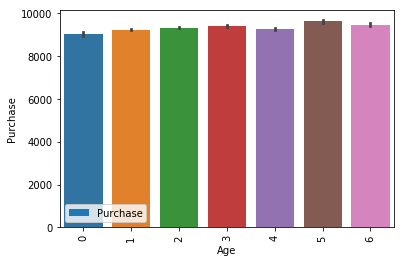

In [31]:
dm[['Age','Purchase']].groupby('Age').mean().plot.bar()
sns.barplot('Age', 'Purchase', data = dm)
plt.show()

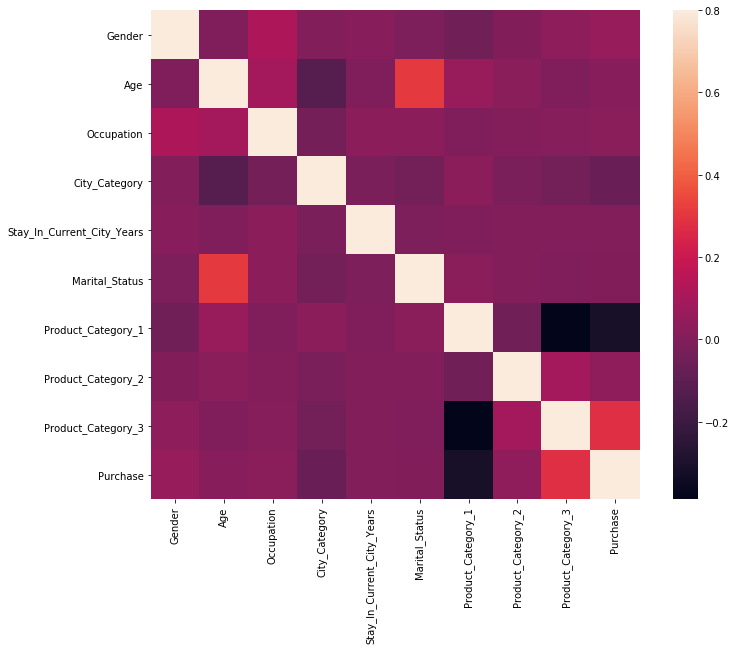

In [32]:
corrmat = dm.corr()
fig,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

It can be seen that nothing is highly correlated with the Purchase variable. Although a few conclusions can be drawn:

Product_Category_1 has a negative correlation with Purchase.
Maritial_Status and Age are strongly correlated. As Expected.
Product_Category_3 has a strong correlation with Purchase. Maybe the products in this category were cheap. Let's chrun out some number related to this.

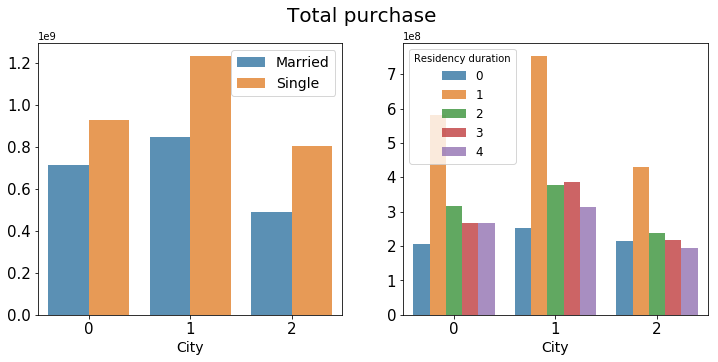

In [35]:
df['Marital_Status_label']=np.where(df['Marital_Status'] == 0,'Single','Married')
df_Tpurchase_by_City_Marital = df.groupby(['City_Category','Marital_Status_label']).agg({'Purchase':np.sum}).reset_index()
df_Tpurchase_by_City_Stay = df.groupby(['City_Category','Stay_In_Current_City_Years']).agg({'Purchase':np.sum}).reset_index()
fig = plt.figure(figsize=(12,5))
fig.suptitle('Total purchase',fontsize=20)
plt.subplot(121)
sns.barplot('City_Category','Purchase',hue='Marital_Status_label',data=df_Tpurchase_by_City_Marital,alpha = 0.8)
plt.xlabel('City',fontsize=14)
plt.ylabel('')
plt.legend(frameon=True,fontsize=14)
plt.tick_params(labelsize=15)
plt.subplot(122)
sns.barplot('City_Category','Purchase',hue='Stay_In_Current_City_Years',data=df_Tpurchase_by_City_Stay,alpha = 0.8)
plt.xlabel('City',fontsize=14)
plt.ylabel('')
plt.legend(title='Residency duration',frameon=True,fontsize=12,loc=2)
plt.tick_params(labelsize=15)
df.drop('Marital_Status_label',axis=1,inplace=True)

In [47]:
# checking the dependency of product 1 on purchasing power

df[['Product_Category_1', 'Purchase']].groupby('Product_Category_1').mean()

,Purchase
Product_Category_1,
1,13607.701495
2,11255.680752
3,10096.841705
4,2328.862886
5,6238.004045
6,15837.893573
7,16373.830153
8,7497.354850
9,15538.297030


The mu 9333.859852635065 and Sigma 4981.017499809046 for the curve


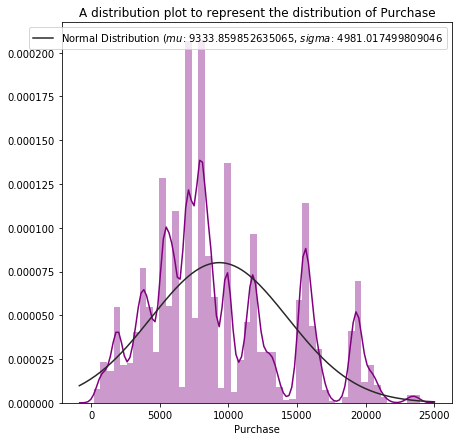

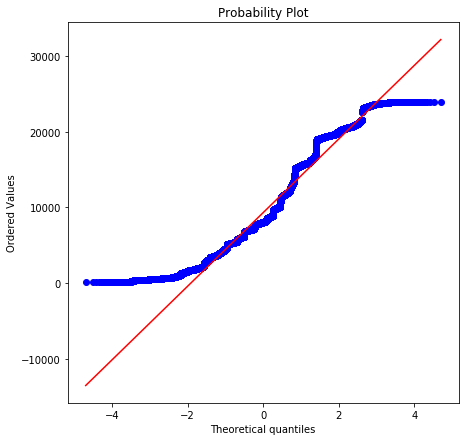

In [49]:
# visualizing the purchase attribute which is our target variable

# importing important libraries
from scipy import stats
from scipy.stats import norm

# plotting a distribution plot for the target variable
plt.rcParams['figure.figsize'] = (7, 7)
sns.distplot(df['Purchase'], color = 'purple', fit = norm)

# fitting the target variable to the normal curve 
mu, sigma = norm.fit(df['Purchase']) 
print("The mu {} and Sigma {} for the curve".format(mu, sigma))

plt.title('A distribution plot to represent the distribution of Purchase')
plt.legend(['Normal Distribution ($mu$: {}, $sigma$: {}'.format(mu, sigma)], loc = 'best')
plt.show()

# plotting the QQplot
stats.probplot(df['Purchase'], plot = plt)
plt.show()

In [51]:
# splitting the data into dependent and independents sets

y = df['Purchase']

# now removing the purchase column from the dataset
df = df.drop(['Purchase'], axis = 1)

x = df

# checking the shapes of x and y
print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)

Shape of x:  (537577, 10)
Shape of y:  (537577,)


In [52]:
# splitting into training and testing

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (376303, 10)
Shape of x_test:  (161274, 10)
Shape of y_train:  (376303,)
Shape of y_test:  (161274,)


In [53]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [54]:
# predictive analytics
# regression analysis
# Linear Regression

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

model = Ridge()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 1678.7858786859251
R2 Score: 0.8864722412044397


In [55]:
# predictive analytics
# regression analysis
# Linear Regression

from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

model = ElasticNet()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 2275.2137366432084
R2 Score: 0.7914760938518314


In [56]:
# predictive analytics
# regression analysis
# Linear Regression

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

model = Lasso()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 1678.7879989299347
R2 Score: 0.8864719544416004


In [57]:
# predictive analytics
# regression analysis
# Linear Regression

from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

model = ElasticNet()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 2275.2137366432084
R2 Score: 0.7914760938518314


In [58]:
# predictive analytics
# regression analysis
# Linear Regression

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

model = GradientBoostingRegressor(n_estimators = 100, max_depth = 5, min_samples_split = 2, learning_rate = 0.1)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 635.3238102027107
R2 Score: 0.9837407049120824
